In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq
import math


[(5.385164807134504, 0, 'A', [])]
B 6.2 2.2 4.0
C 5.60555127546399 2.0 3.605551275463989

[(5.60555127546399, 2.0, 'C', ['A']), (6.2, 2.2, 'B', ['A'])]
D 6.43606797749979 4.2 2.23606797749979
E 6.23606797749979 4.0 2.23606797749979

[(6.2, 2.2, 'B', ['A']), (6.43606797749979, 4.2, 'D', ['A', 'C']), (6.23606797749979, 4.0, 'E', ['A', 'C'])]
D 6.43606797749979 4.2 2.23606797749979

[(6.23606797749979, 4.0, 'E', ['A', 'C']), (6.43606797749979, 4.2, 'D', ['A', 'C']), (6.43606797749979, 4.2, 'D', ['A', 'B'])]
F 6.4 6.4 0.0

[(6.4, 6.4, 'F', ['A', 'C', 'E']), (6.43606797749979, 4.2, 'D', ['A', 'C']), (6.43606797749979, 4.2, 'D', ['A', 'B'])]


C:\Users\USER\AppData\Local\Temp\ipykernel_22028\678553822.py:98: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


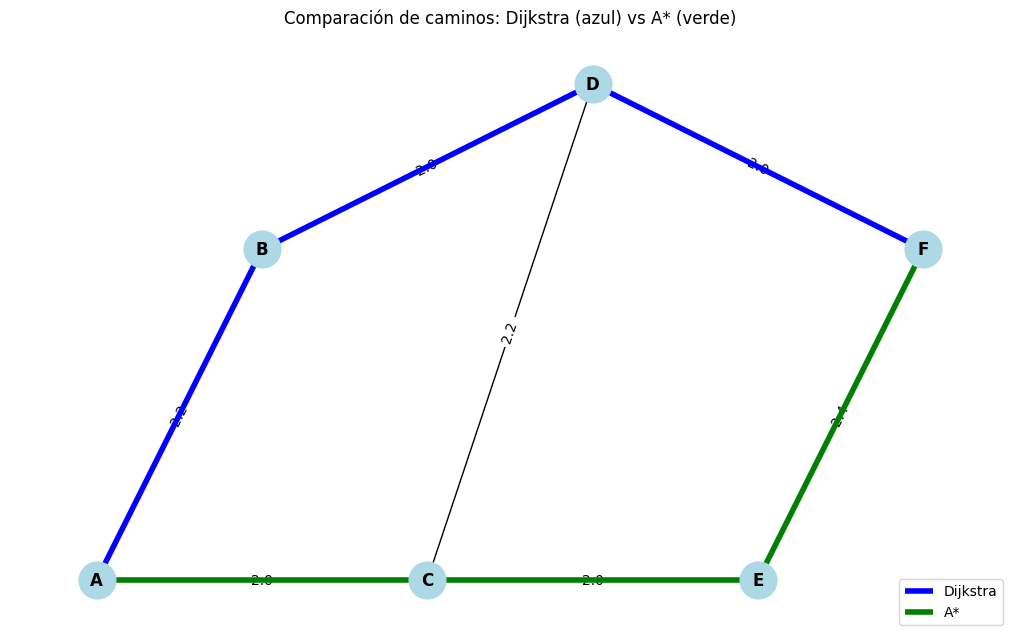

(['A', 'B', 'D', 'F'], 6.2, ['A', 'C', 'E', 'F'], 6.4)

In [ ]:
G = nx.Graph()

# Agregar nodos con coordenadas (para la heurística en A*)
positions = {
    'A': (0, 0),
    'B': (1, 2),
    'C': (2, 0),
    'D': (3, 3),
    'E': (4, 0),
    'F': (5, 2)
}

G.add_nodes_from(positions.keys())

# Aristas con pesos
edges = [
    ('A', 'B', 2.2),
    ('A', 'C', 2.0),
    ('B', 'D', 2.0),
    ('C', 'D', 2.2),
    ('C', 'E', 2.0),
    ('D', 'F', 2.0),
    ('E', 'F', 2.4)
]
G.add_weighted_edges_from(edges)

# Heurística: distancia euclidiana hasta el nodo objetivo
def heuristic(n, goal):
    x1, y1 = positions[n]
    x2, y2 = positions[goal]
    return math.hypot(x2 - x1, y2 - y1)

# Dijkstra
def dijkstra(graph, start, goal):
    heap = [(0, start, [])]
    visited = set()
    while heap:
        (cost, node, path) = heapq.heappop(heap)
        if node in visited:
            continue
        path = path + [node]
        if node == goal:
            return path, cost
        visited.add(node)
        for neighbor in graph.neighbors(node):
            if neighbor not in visited:
                weight = graph[node][neighbor]['weight']
                heapq.heappush(heap, (cost + weight, neighbor, path))
    return [], float('inf')

# A*
def astar(graph, start, goal):
    heap = [(0 + heuristic(start, goal), 0, start, [])]
    visited = set()
    while heap:
        (f_cost, cost, node, path) = heapq.heappop(heap)
        if node in visited:
            continue
        path = path + [node]
        
        if node == goal:
            return path, cost
        visited.add(node)
        for neighbor in graph.neighbors(node):
            if neighbor not in visited:
                weight = graph[node][neighbor]['weight']
                g = cost + weight
                h = heuristic(neighbor, goal)
                heapq.heappush(heap, (g + h, g, neighbor, path))
    return [], float('inf')

# Ejecutar ambos algoritmos
d_path, d_cost = dijkstra(G, 'A', 'F')
a_path, a_cost = astar(G, 'A', 'F')

# Visualizar resultados
plt.figure(figsize=(10, 6))
nx.draw(G, pos=positions, with_labels=True, node_color='lightblue', node_size=700, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=positions, edge_labels={(u, v): f"{w:.1f}" for (u, v, w) in edges})

# Resaltar caminos
def highlight_path(path, color, label):
    for i in range(len(path) - 1):
        u, v = path[i], path[i + 1]
        nx.draw_networkx_edges(G, pos=positions, edgelist=[(u, v)], width=4, edge_color=color, label=label if i == 0 else "")

highlight_path(d_path, 'blue', 'Dijkstra')
highlight_path(a_path, 'green', 'A*')

plt.legend(loc='lower right')
plt.title("Comparación de caminos: Dijkstra (azul) vs A* (verde)")
plt.axis('off')
plt.tight_layout()
plt.show()

d_path, d_cost, a_path, a_cost
